In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/Users/baileyhsu/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# First We Read In the Data From Kaggle
gcl = pd.read_csv('../baileyhsu/Downloads/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv')

In [3]:
# Show the first 10 lines of the Data
gcl.head(10)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
5,1750-06-01,12.937,1.724,NaN,NaN,NaN,NaN,NaN,NaN
6,1750-07-01,15.868,1.911,NaN,NaN,NaN,NaN,NaN,NaN
7,1750-08-01,14.750,2.231,NaN,NaN,NaN,NaN,NaN,NaN
8,1750-09-01,11.413,2.637,NaN,NaN,NaN,NaN,NaN,NaN
9,1750-10-01,6.367,2.668,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Extracting the 2 columns and convert the dt columns to datetime

gcl = gcl[['dt','LandAverageTemperature']]
gcl['dt'] = pd.to_datetime(gcl['dt'])

In [5]:
# Apply the lambda function to extract the year, month, and the date portion of the data

gcl['year'] = gcl['dt'].map(lambda x: x.year)
gcl['month'] = gcl['dt'].map(lambda x: x.month)
gcl['date'] = gcl['dt'].map(lambda x: x.date)

In [6]:
# Showing the updated data frame

gcl

,dt,LandAverageTemperature,year,month,date
0,1750-01-01 00:00:00,3.034,1750,1,<built-in method date of Timestamp object at 0...
1,1750-02-01 00:00:00,3.083,1750,2,<built-in method date of Timestamp object at 0...
2,1750-03-01 00:00:00,5.626,1750,3,<built-in method date of Timestamp object at 0...
3,1750-04-01 00:00:00,8.490,1750,4,<built-in method date of Timestamp object at 0...
4,1750-05-01 00:00:00,11.573,1750,5,<built-in method date of Timestamp object at 0...
5,1750-06-01 00:00:00,12.937,1750,6,<built-in method date of Timestamp object at 0...
6,1750-07-01 00:00:00,15.868,1750,7,<built-in method date of Timestamp object at 0...
7,1750-08-01 00:00:00,14.750,1750,8,<built-in method date of Timestamp object at 0...
8,1750-09-01 00:00:00,11.413,1750,9,<built-in method date of Timestamp object at 0...
9,1750-10-01 00:00:00,6.367,1750,10,<built-in method date of Timestamp object at 0...


In [7]:
# Here we create a function season to specify the season based on the month argument
# We then can use it to obtain the temperature average of each season in one year


def season(month):
    if month>=3 and month<=5:
        return 'spring'
    elif month>5 and month<=8:
        return 'summer'
    elif month>8 and month<=11:
        return 'autumn'
    else:
        return 'winter'

gcl['season']= map(season,gcl['month'])

years=range(gcl['year'].min(),gcl['year'].max()+1)

sp_mean=[]
su_mean=[]
au_mean=[]
wi_mean=[]


for year in years:
    current=gcl[gcl['year']==year]
    sp_mean.append(current[current['season']=='spring']['LandAverageTemperature'].mean())
    su_mean.append(current[current['season']=='summer']['LandAverageTemperature'].mean())
    au_mean.append(current[current['season']=='autumn']['LandAverageTemperature'].mean())
    wi_mean.append(current[current['season']=='winter']['LandAverageTemperature'].mean())
    
              


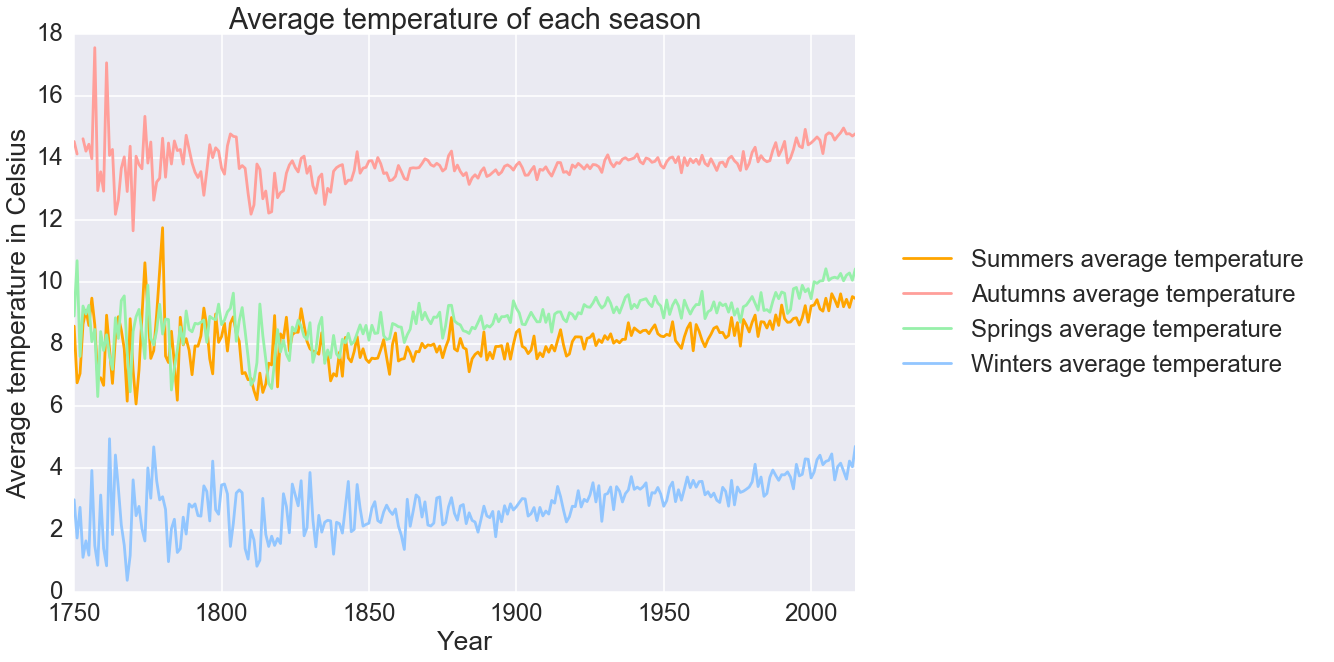

In [8]:
sns.set(style="darkgrid")
sns.set_color_codes("pastel")
sns.set_context("poster",font_scale=1.5)
f, ax = plt.subplots(figsize=(14, 10))
plt.xlim(gcl['year'].min(),gcl['year'].max())

plt.plot(years, sp_mean, label='Summers average temperature', color='orange')
plt.plot(years, su_mean, label='Autumns average temperature', color='r')
plt.plot(years, au_mean, label='Springs average temperature', color='g')
plt.plot(years, wi_mean, label='Winters average temperature', color='b')


ax.set_ylabel('Average temperature in Celsius')
ax.set_xlabel('Year')
ax.set_title('Average temperature of each season')
legend = plt.legend(loc='center left', bbox_to_anchor=(1,0.5), frameon=False, borderpad=1, borderaxespad=1)

It can be seen from the above figure that the temperature increased noticebly from 1975 till now

Next, we will look at countries with the lowest yearly average temperature

In [ ]:
# First We Read In the Data From Kaggle

In [9]:
gcl2 = pd.read_csv('../baileyhsu/Downloads/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByMajorCity.csv')

In [10]:
gcl2.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
5,1849-06-01,24.844,1.402,Abidjan,Côte D'Ivoire,5.63N,3.23W
6,1849-07-01,24.058,1.254,Abidjan,Côte D'Ivoire,5.63N,3.23W
7,1849-08-01,23.576,1.265,Abidjan,Côte D'Ivoire,5.63N,3.23W
8,1849-09-01,23.662,1.226,Abidjan,Côte D'Ivoire,5.63N,3.23W
9,1849-10-01,25.263,1.175,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [11]:
gcl2 = gcl2[['dt','AverageTemperature','City']]

In [12]:
gcl2['dt'] = pd.to_datetime(gcl2['dt'])
# Apply the lambda function to extract the year, month, and the date portion of the data

gcl2['year'] = gcl2['dt'].map(lambda x: x.year)
gcl2['month'] = gcl2['dt'].map(lambda x: x.month)
gcl2['date'] = gcl2['dt'].map(lambda x: x.date)

In [64]:
cities = gcl2['City'].unique()

In [104]:
city_temp_list=[]
for city in cities:    
    city_temp_list.append([city, gcl2[gcl2['City']==city]['AverageTemperature'].mean()])      

In [105]:
sortedcity = sorted(city_temp_list, key=lambda tup: tup[1])

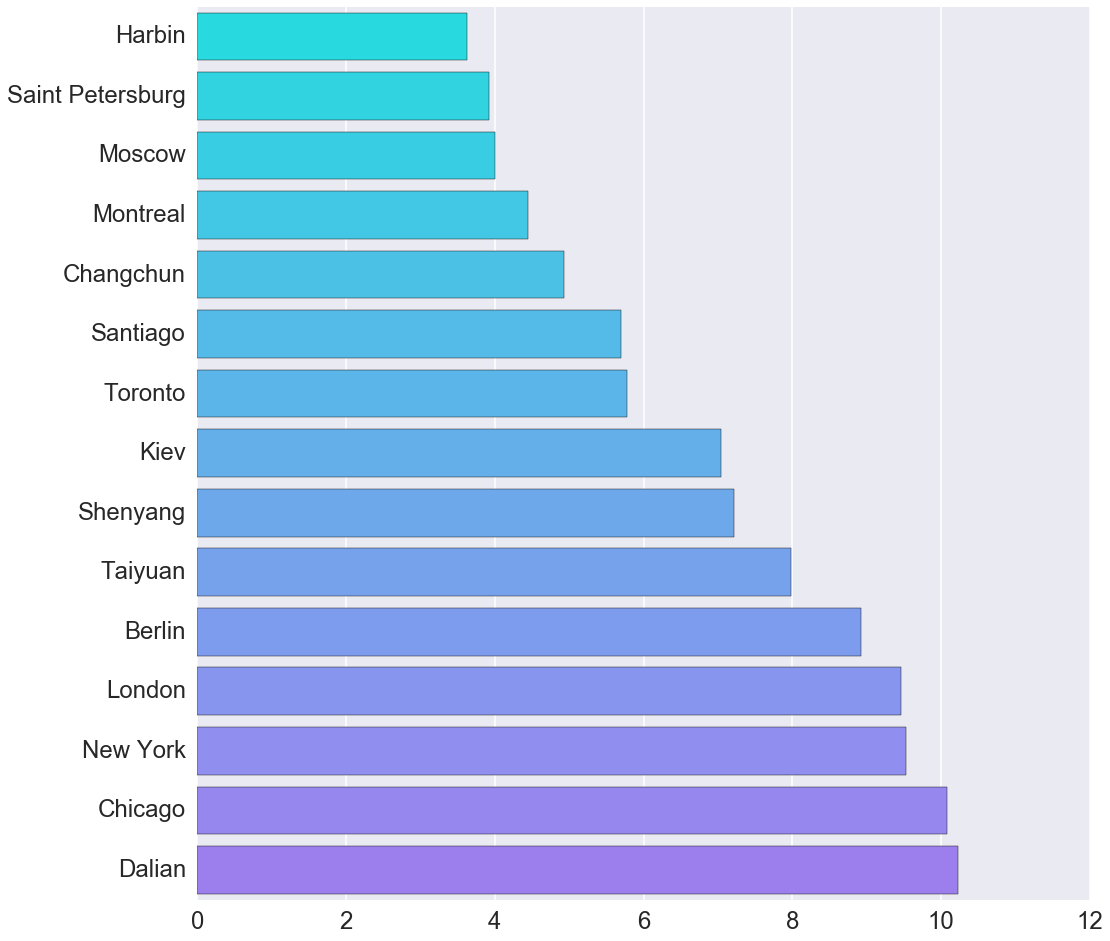

In [121]:
citylist=[]
templist=[]
for i in range(len(sortedcity)):
     citylist.append(sortedcity[i][0])
     templist.append(sortedcity[i][1])
g, ax = plt.subplots(figsize=(16, 16))
sns.barplot(y=citylist[:15], x=templist[:15], palette=sns.color_palette("cool", 25), ax=ax)    
    
   

It's no surprise that Harbin is the coldest. It looks northern cities in the Asia is much colder in general.